In [57]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
images_dir = r""

Found 3376 images belonging to 4 classes.
Found 841 images belonging to 4 classes.


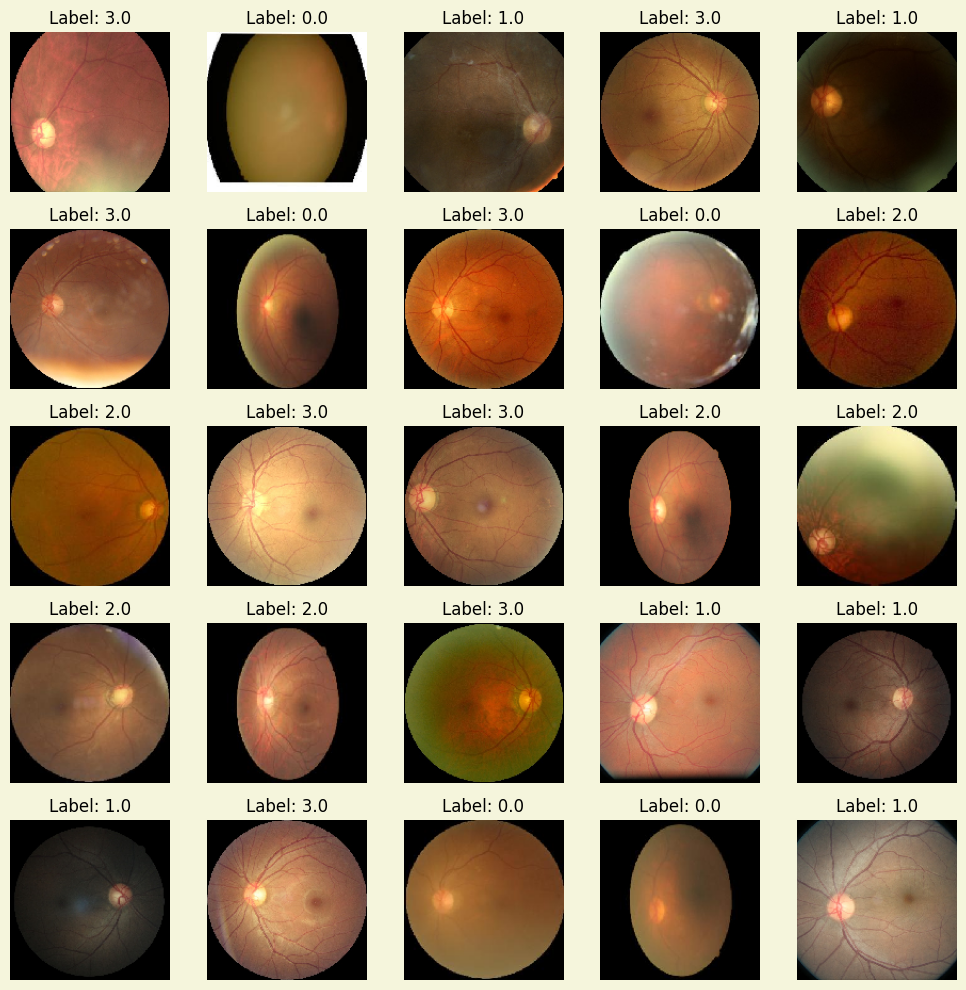

In [63]:
datagen = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip = False,
    fill_mode = 'nearest',
    validation_split = 0.2,
)

train_generator = datagen.flow_from_directory(
    images_dir, 
    target_size =(150, 150),
    color_mode = 'rgb',
    batch_size = 32,
    class_mode = 'sparse',
    subset = 'training',
    shuffle = True,
    seed = 42
)

test_generator = datagen.flow_from_directory(
    images_dir,
    target_size = (150, 150),
    color_mode = 'rgb',
    batch_size = 32,
    class_mode = 'sparse', # Devuelve etiquetas enteras en vez de one-hot
    subset = "validation", 
    shuffle = True,
    seed = 42
)

#Crear un plot para visualizar las imagenes
def plot_images(images, titles):
    plt.figure(figsize=(10, 10), facecolor = 'beige')
    for i in range(min(25, len(images))):
        plt.subplot(5, 5, i + 1)
        plt.imshow(images[i])
        plt.title(titles[i])
        plt.axis('off')
    plt.tight_layout()
    plt.show()


images, labels = next(train_generator)
plot_images(images, [f'Label: {label}' for label in labels])

In [64]:
print(test_generator.class_indices)

{'cataract': 0, 'diabetic_retinopathy': 1, 'glaucoma': 2, 'normal': 3}


In [75]:
def create_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
        layers.MaxPooling2D(2,2),

        layers.Conv2D(64, (3, 3), activation= 'relu'),
        layers.MaxPooling2D(2, 2),

        layers.Conv2D(128, (3, 3), activation= 'relu'),
        layers.MaxPooling2D(2, 2),
          
        layers.Flatten(),

        layers.Dense(512, activation='relu'),
        
        layers.Dense(4, activation = 'softmax')
    ])
    return model

model = create_model()

In [66]:
#Diccionario de optimizadores
optimizers = {
    'Adam': tf.keras.optimizers.Adam(),
    'SGD': tf.keras.optimizers.SGD(),
    'RMSprop': tf.keras.optimizers.RMSprop()
}

### Probando el modelo...

In [79]:
optimizer_name = 'SGD'
epochs = 60

model.compile(
    optimizer = optimizer_name,
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

history = model.fit(
    train_generator,
    batch_size = 32,
    validation_data = (test_generator),
    validation_steps = 10,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs = epochs,
    verbose = 1
)
#model.summary()

Epoch 1/60
105/105 ━━━━━━━━━━━━━━━━━━━━ 38s 357ms/step - accuracy: 0.8594 - loss: 0.3737 - val_accuracy: 0.7094 - val_loss: 0.6542
Epoch 2/60
  1/105 ━━━━━━━━━━━━━━━━━━━━ 30s 293ms/step - accuracy: 0.8750 - loss: 0.4375

C:\Users\nicol\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8750 - loss: 0.4375 - val_accuracy: 0.7375 - val_loss: 0.6062
Epoch 3/60
105/105 ━━━━━━━━━━━━━━━━━━━━ 39s 369ms/step - accuracy: 0.8562 - loss: 0.3782 - val_accuracy: 0.6969 - val_loss: 0.7374
Epoch 4/60
105/105 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.7500 - loss: 0.6373 - val_accuracy: 0.6844 - val_loss: 0.6757
Epoch 5/60
105/105 ━━━━━━━━━━━━━━━━━━━━ 37s 347ms/step - accuracy: 0.8614 - loss: 0.3622 - val_accuracy: 0.7344 - val_loss: 0.5854
Epoch 6/60
105/105 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8438 - loss: 0.4010 - val_accuracy: 0.6750 - val_loss: 0.7002
Epoch 7/60
105/105 ━━━━━━━━━━━━━━━━━━━━ 42s 400ms/step - accuracy: 0.8694 - loss: 0.3539 - val_accuracy: 0.7250 - val_loss: 0.6711
Epoch 8/60
105/105 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8125 - loss: 0.4357 - val_accuracy: 0.7312 - val_loss: 0.6513
Epoch 9/60
105/105 ━━━━━━━━━━━━━━━━━━━━ 38s 360ms/step - accuracy: 0.8764 - loss: 0.3389 - val_accurac

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Entrenado con: SGD
Épocas: 60
Precisión: 0.7158
Perdida: 0.7107


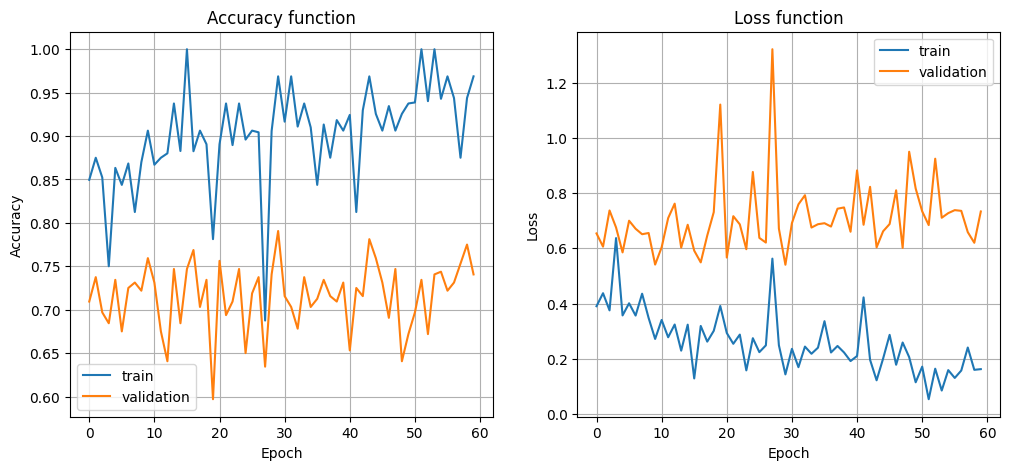

In [80]:
#Obtener el accuracy y el loss
print(history.history.keys())

accuracy = sum(history.history['val_accuracy'])/len(history.history['val_accuracy'])
loss = sum(history.history['val_loss'])/len(history.history['val_loss'])

print(f"\nEntrenado con: {optimizer_name}")
print(f"Épocas: {epochs}")
print(f"Precisión: {accuracy:.4f}\nPerdida: {loss:.4f}") #:.4f Redondeamos decimales

#Gráficamos accuracy y loss
plt.figure(figsize = (12, 5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label = "train")
plt.plot(history.history['val_accuracy'], label = "validation")
plt.title("Accuracy function")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid()
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label = "train")
plt.plot(history.history['val_loss'], label = "validation")
plt.title("Loss function")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid()
plt.legend()

plt.show()